In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import graphIO

In [2]:
SIGNIFICANCE_LEVEL = 0.05

In [3]:
lrc_p_values = np.load('output/lrc_proc_2024-04-05_16-02-04.npy')
new_p_values = np.load('output/new_proc_2024-04-04_14-33-09.npy')

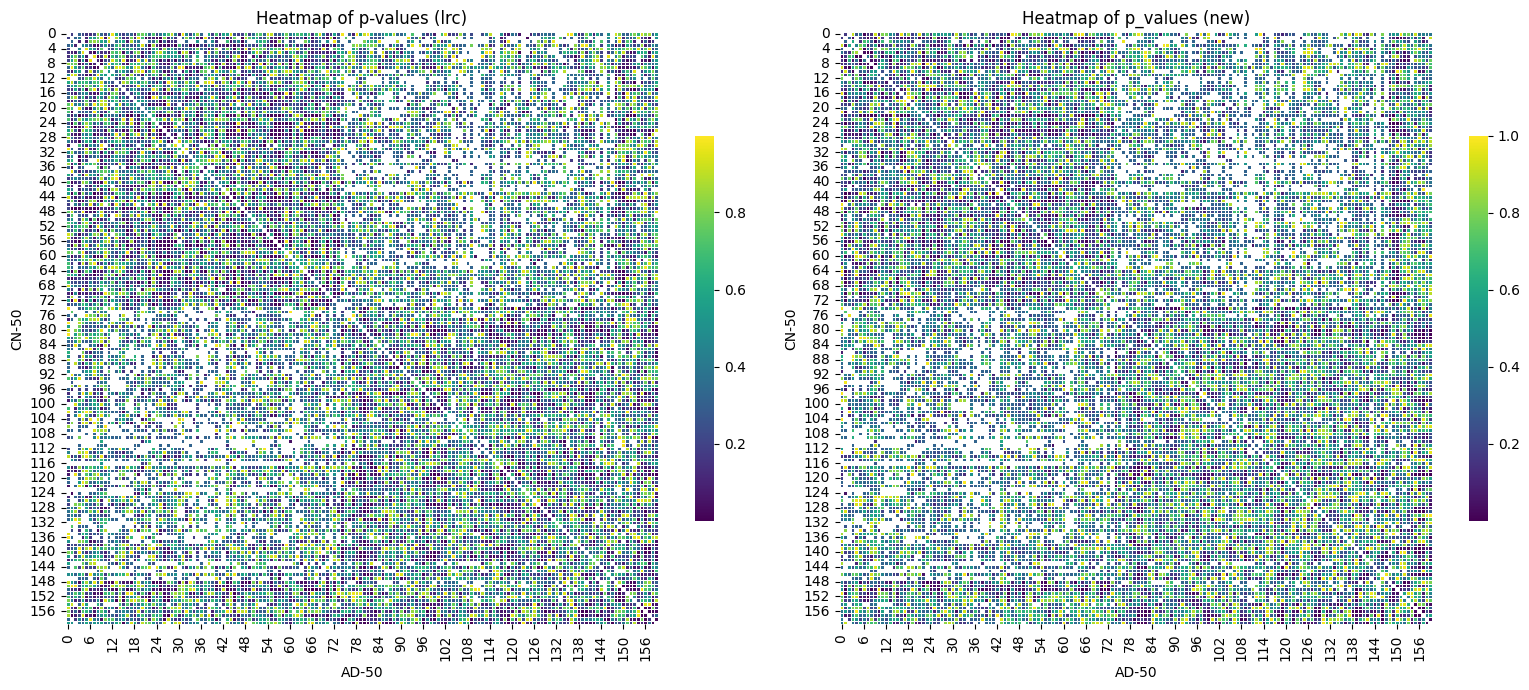

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plotting lrc_p_values heatmap
sns.heatmap(lrc_p_values, cmap='viridis', cbar=True, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0])
axs[0].set_title(f'Heatmap of p-values (lrc)')
axs[0].set_xlabel('AD-50')
axs[0].set_ylabel('CN-50')

# Plotting new_p_values heatmap
sns.heatmap(new_p_values, cmap='viridis', cbar=True, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[1])
axs[1].set_title(f'Heatmap of p_values (new)')
axs[1].set_xlabel('AD-50')
axs[1].set_ylabel('CN-50')

plt.tight_layout()
plt.show()

In [5]:
significant_lrc_p_values = lrc_p_values.copy()
significant_new_p_values = new_p_values.copy()
# Replace values above significance level with nan
significant_lrc_p_values[lrc_p_values >= SIGNIFICANCE_LEVEL] = np.nan
significant_new_p_values[new_p_values >= SIGNIFICANCE_LEVEL] = np.nan

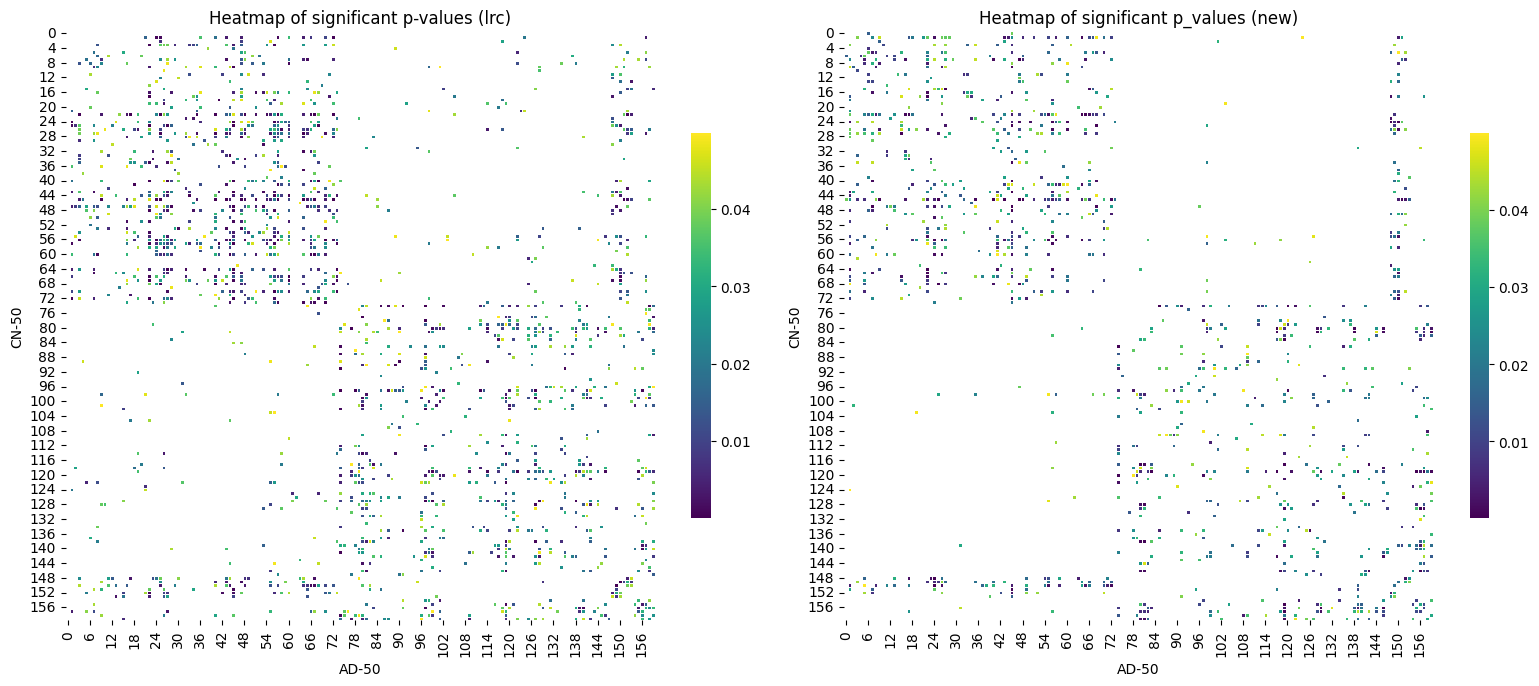

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plotting lrc_p_values heatmap
sns.heatmap(significant_lrc_p_values, cmap='viridis', cbar=True, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0])
axs[0].set_title(f'Heatmap of significant p-values (lrc)')
axs[0].set_xlabel('AD-50')
axs[0].set_ylabel('CN-50')

# Plotting new_p_values heatmap
sns.heatmap(significant_new_p_values, cmap='viridis', cbar=True, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[1])
axs[1].set_title(f'Heatmap of significant p_values (new)')
axs[1].set_xlabel('AD-50')
axs[1].set_ylabel('CN-50')

plt.tight_layout()
plt.show()

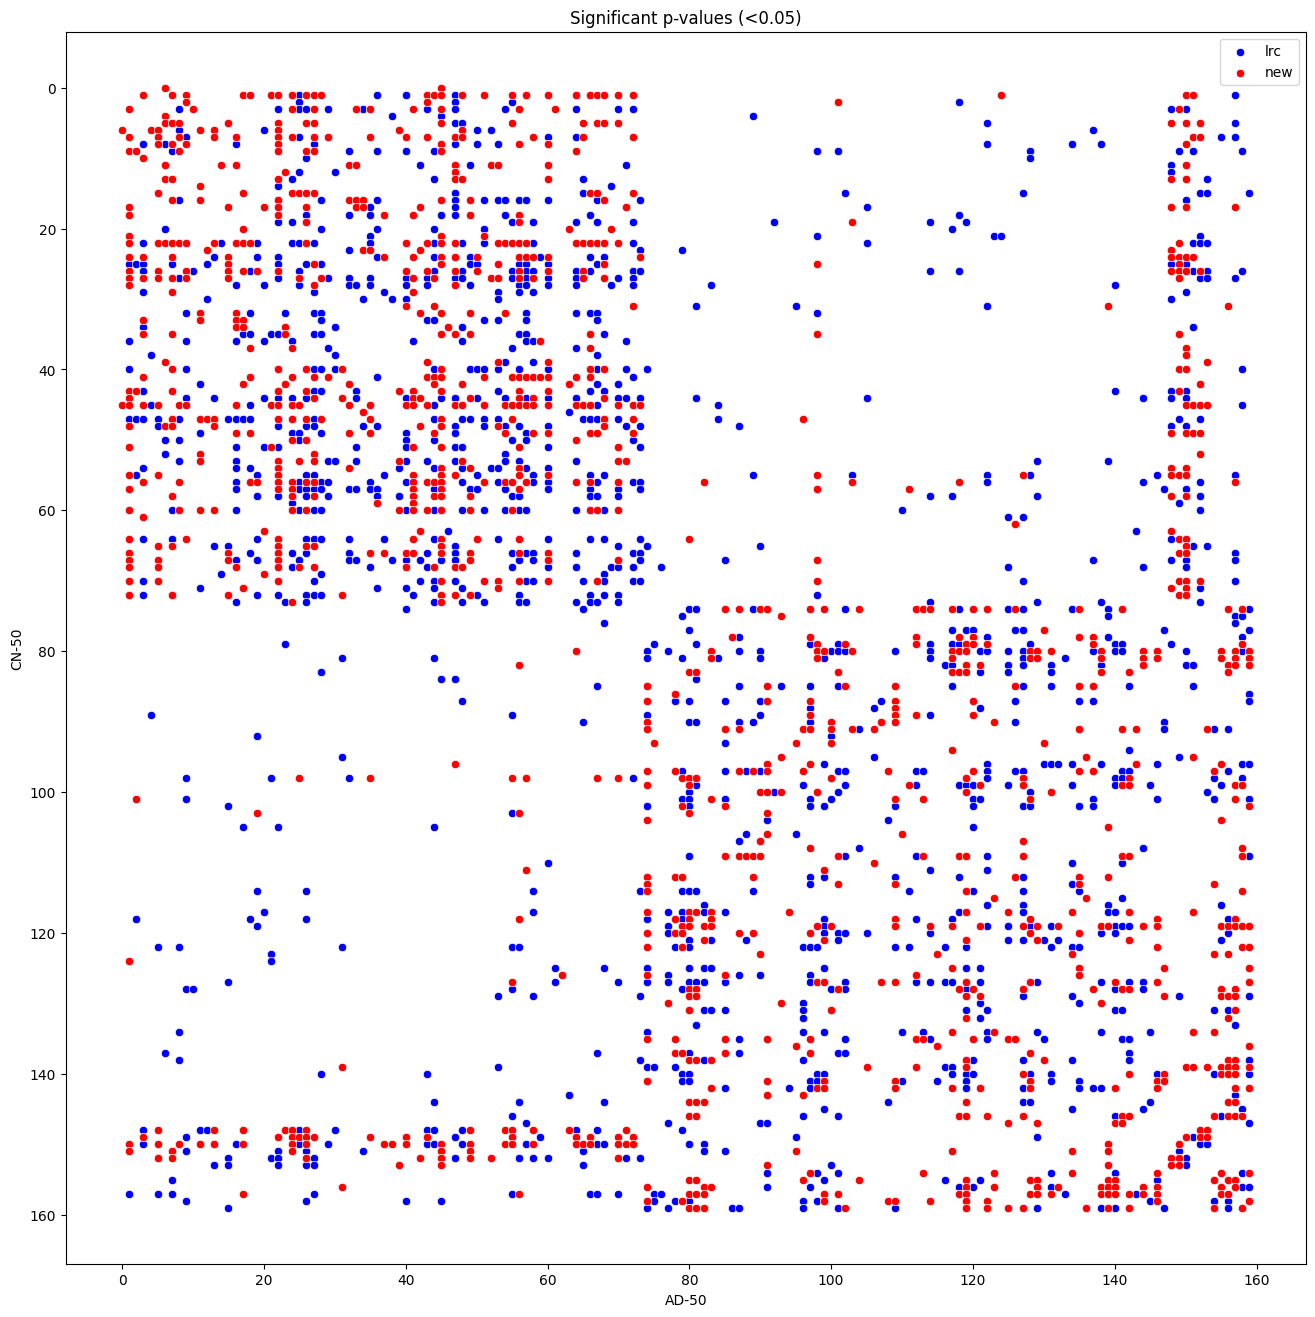

In [7]:
# Find indices of desired values in lrc_p_values and new_p_values
lrc_indices = np.where(~np.isnan(significant_lrc_p_values))
new_indices = np.where(~np.isnan(significant_new_p_values))


# Plotting the indices using seaborn scatterplot
plt.figure(figsize=(16, 16))
sns.scatterplot(x=lrc_indices[1], y=lrc_indices[0], color='blue', label='lrc')
sns.scatterplot(x=new_indices[1], y=new_indices[0], color='red', label='new')
plt.legend()
plt.xlabel('AD-50')
plt.ylabel('CN-50')
plt.gca().invert_yaxis()
plt.title('Significant p-values (<0.05)')
plt.show()

In [8]:
n= 50
# Get the indices of the n smallest p-values for lrc
lrc_p_values_flat = significant_lrc_p_values.flatten()
indices_lrc = np.argpartition(lrc_p_values_flat, n)[:n]
min_indices_lrc = np.unravel_index(indices_lrc, significant_lrc_p_values.shape)
min_lrc_p_values = significant_lrc_p_values[min_indices_lrc]


# Get the indices of the n smallest p-values for new
new_p_values_flat = significant_new_p_values.flatten()
indices_new = np.argpartition(new_p_values_flat, n)[:n]
min_indices_new = np.unravel_index(indices_new, significant_new_p_values.shape)
min_new_p_values = significant_new_p_values[min_indices_new]

# For lrc_p_values
lrc_tuples = np.array(list(zip(min_indices_lrc[0], min_indices_lrc[1])))

# For new_p_values
new_tuples = np.array(list(zip(min_indices_new[0], min_indices_new[1])))

In [9]:
regions = graphIO.read_mappings_from_node_file("data/Destreux160_Defu.node")

In [10]:
most_significant_region_names_new = np.array([(regions[i], regions[j]) for i, j in new_tuples])
most_significant_region_names_lrc = np.array([(regions[i], regions[j]) for i, j in lrc_tuples])

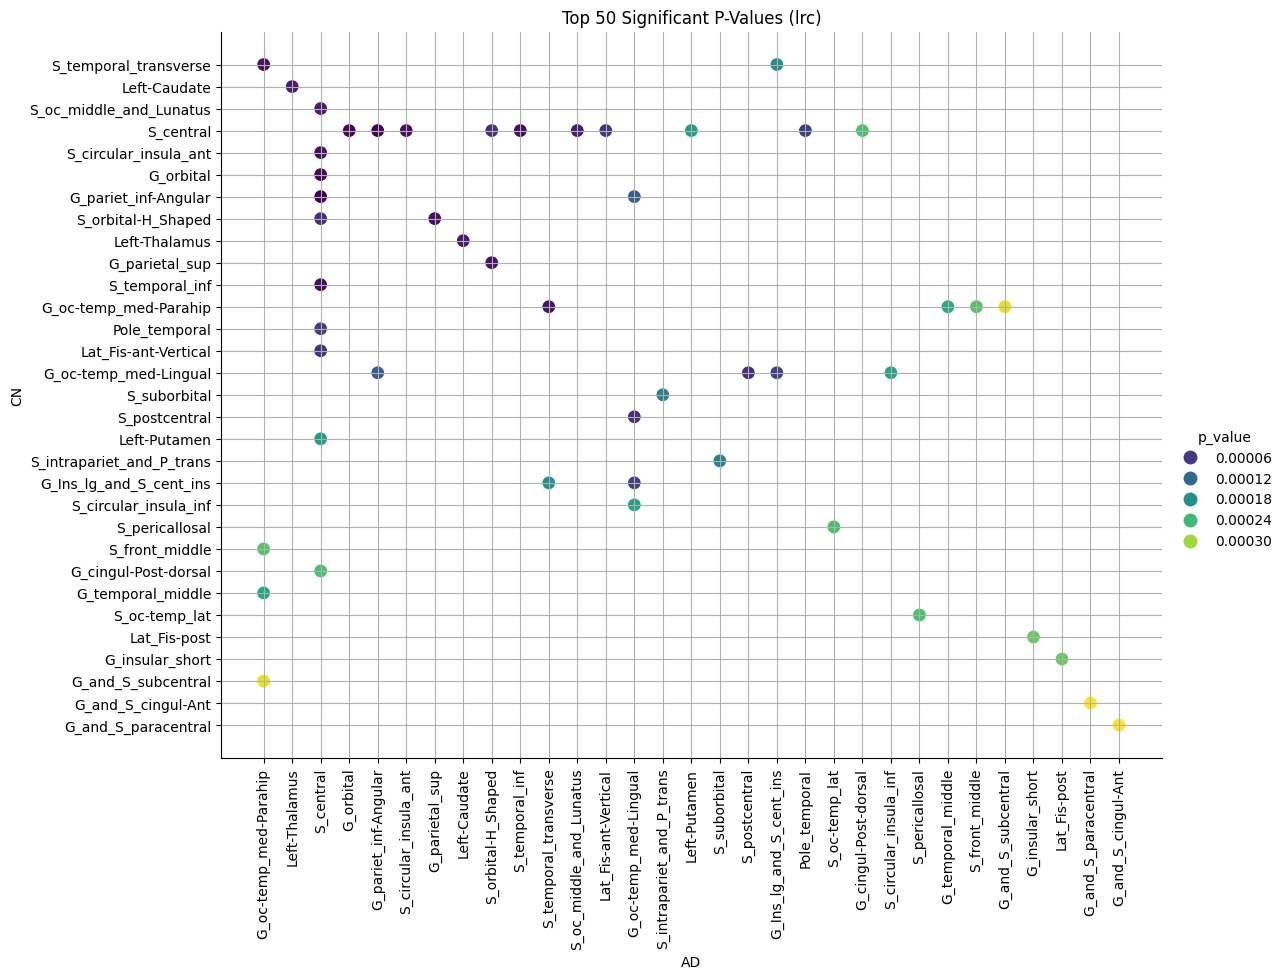

In [11]:
# Assuming you have a DataFrame df with columns 'Category1', 'Category2', 'Value'
df = pd.DataFrame({
    'CN': most_significant_region_names_lrc[:,0],
    'AD': most_significant_region_names_lrc[:,1],
    'p_value': min_lrc_p_values
})
df['p_value'] = pd.to_numeric(df['p_value'])

# Draw the heatmap with the mask and correct aspect ratio
sns.relplot(x='AD', y='CN', hue='p_value', data=df, legend='brief', palette='viridis', height=8, aspect=1.5, s=100)
plt.grid(True)
plt.xticks(rotation=90)
plt.title(f'Top {n} Significant P-Values (lrc)')
plt.show()

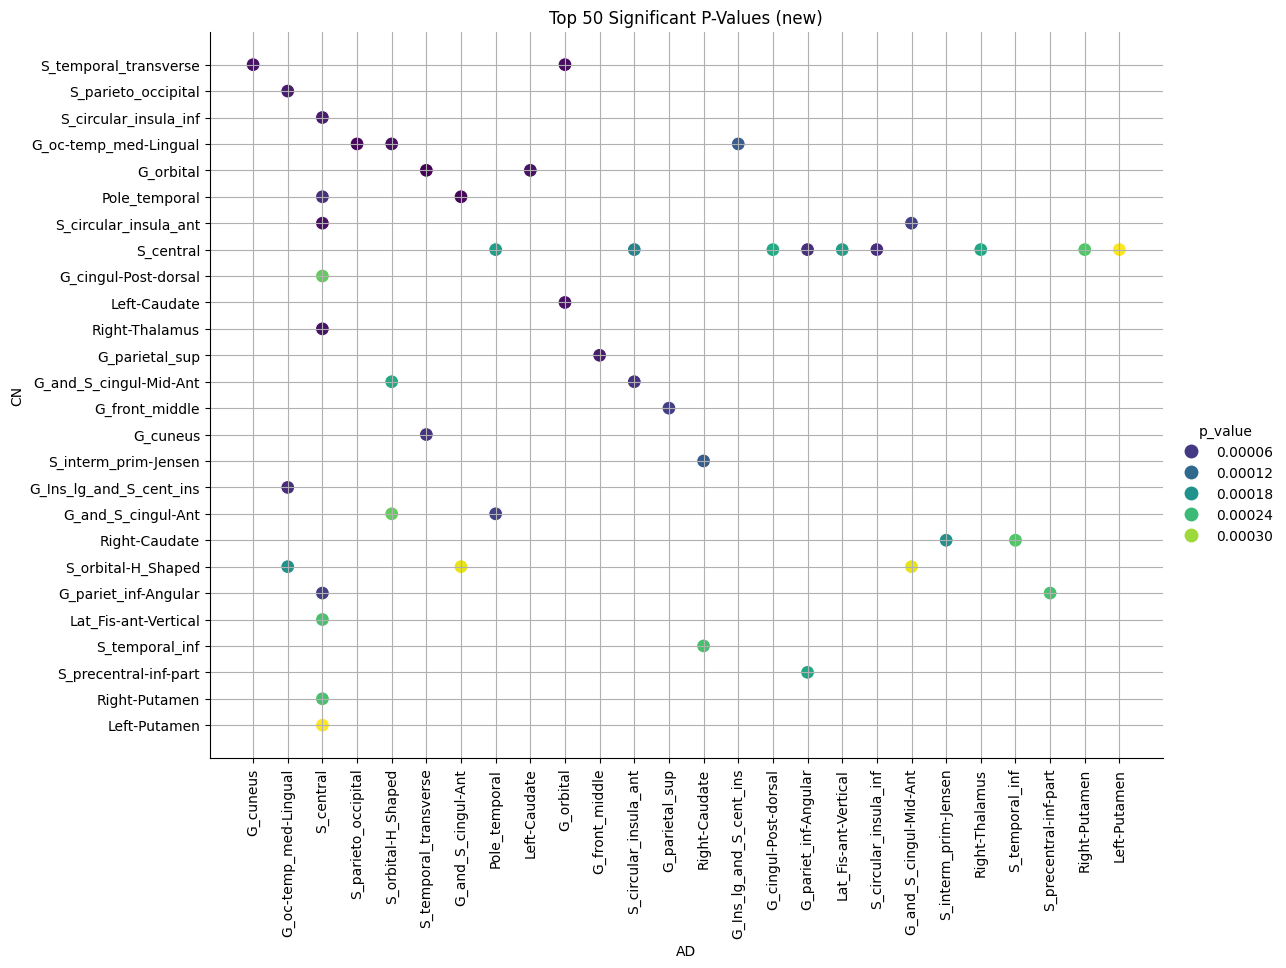

In [12]:
# Assuming you have a DataFrame df with columns 'Category1', 'Category2', 'Value'
df = pd.DataFrame({
    'CN': most_significant_region_names_new[:,0],
    'AD': most_significant_region_names_new[:,1],
    'p_value': min_lrc_p_values
})
df['p_value'] = pd.to_numeric(df['p_value'])

# Draw the heatmap with the mask and correct aspect ratio
sns.relplot(x='AD', y='CN', hue='p_value', data=df, legend='brief', palette='viridis', height=8, aspect=1.5, s=100)
plt.grid(True)
plt.xticks(rotation=90)
plt.title(f'Top {n} Significant P-Values (new)')
plt.show()